# Data Analysis of Heart Disease Dataset

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

In [36]:
hdf=pd.read_csv("H.csv")
hdf

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exange,olpeak,slope,ca,tha,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


### Considering only Numerical Variables

In [37]:
hdf1=hdf.drop(['sex','cp','fbs','restecg','exange','slope','ca','tha','target'],axis=1)
hdf1

,age,trestbps,chol,thalach,olpeak
0,63,145,233,150,2.3
1,67,160,286,108,1.5
2,67,120,229,129,2.6
3,37,130,250,187,3.5
4,41,130,204,172,1.4
...,...,...,...,...,...
298,45,110,264,132,1.2
299,68,144,193,141,3.4
300,57,130,131,115,1.2
301,57,130,236,174,0.0


### Discriptive Statistics Table

In [38]:
k=pd.DataFrame(hdf1.describe())
k

,age,trestbps,chol,thalach,olpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604
std,9.038662,17.599748,51.776918,22.875003,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000
75%,61.000000,140.000000,275.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


### Pairplot for Numerical Variables

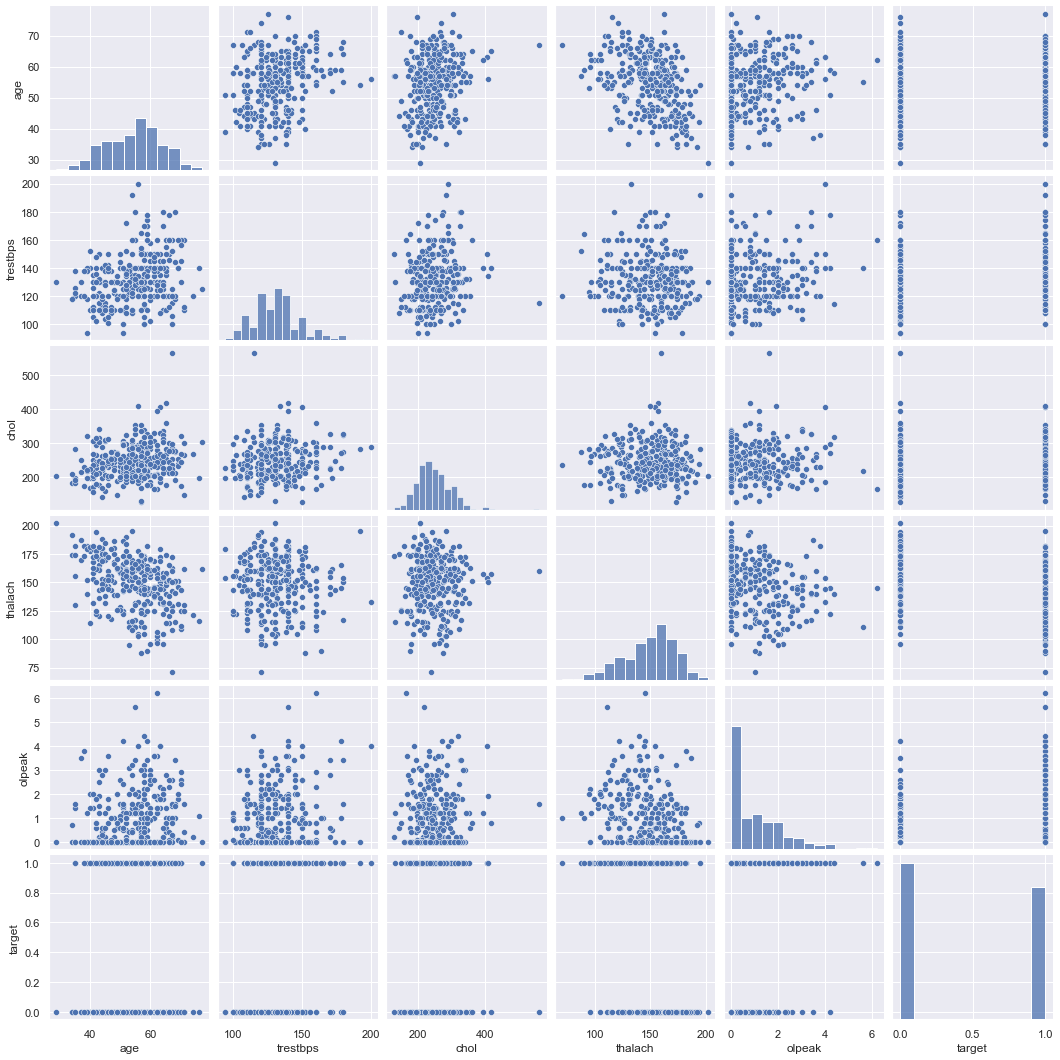

In [39]:
hdf2=hdf.drop(['sex','cp','fbs','restecg','exange','slope','ca','tha'],axis=1)
sns.pairplot(data=hdf2)

### Correlation Matrix and Heatmap for Numerical Variables

In [40]:
# Correlation Matrix
corrMatrix=hdf1.corr()
corrMatrix

,age,trestbps,chol,thalach,olpeak
age,1.000000,0.284946,0.208950,-0.393806,0.203805
trestbps,0.284946,1.000000,0.130120,-0.045351,0.189171
chol,0.208950,0.130120,1.000000,-0.003432,0.046564
thalach,-0.393806,-0.045351,-0.003432,1.000000,-0.343085
olpeak,0.203805,0.189171,0.046564,-0.343085,1.000000


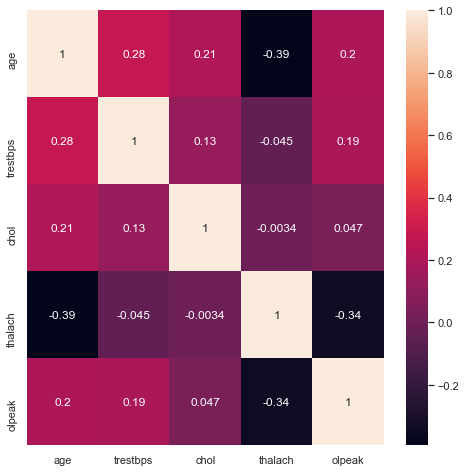

In [41]:
# Correlation Heatmap Matrix
sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(corrMatrix,annot=True)
plt.show()

### Chi-Square test for Association of Categorical Variables

In [42]:
import scipy.stats as st

In [43]:
## Contingency Table of slope(The slope of peak excercise ST segment) and tha(Thalassemia Blood Disorder)
contTable=pd.crosstab(index=hdf['slope'],columns=hdf['tha'])
contTable

tha,3,6,7
slope,,,
1,103,2,37
2,56,14,70
3,8,3,10


In [44]:
## Chi-square test for independence of slope and thal
st.chi2_contingency(contTable)

(36.27598372064132,
 2.5390227240426463e-07,
 4,
 array([[78.2640264 ,  8.90429043, 54.83168317],
        [77.16171617,  8.77887789, 54.05940594],
        [11.57425743,  1.31683168,  8.10891089]]))

In [45]:
## Contingency Table of sex and cp(Chest pain type)
contTable1=pd.crosstab(index=hdf['sex'],columns=hdf['cp'])
contTable1

cp,1,2,3,4
sex,,,,
0,4,18,35,40
1,19,32,51,104


In [46]:
## Chi-square test for independence of sex and cp
st.chi2_contingency(contTable1)

(6.79145867175301,
 0.07885024424877551,
 3,
 array([[ 7.3630363 , 16.00660066, 27.53135314, 46.0990099 ],
        [15.6369637 , 33.99339934, 58.46864686, 97.9009901 ]]))

In [47]:
## Contingency Table of ca(Number of major vessels (0-3) coloured by fluroscopy) and fbs(Fasting blood sugar)
contTable2=pd.crosstab(index=hdf['ca'],columns=hdf['fbs'])
contTable2

fbs,0,1
ca,,
0,156,20
1,58,10
2,29,10
3,15,5


In [48]:
# Chi-square test for independence of ca and fbs
st.chi2_contingency(contTable2)

(6.91335019669493,
 0.07471148164405114,
 3,
 array([[149.86138614,  26.13861386],
        [ 57.9009901 ,  10.0990099 ],
        [ 33.20792079,   5.79207921],
        [ 17.02970297,   2.97029703]]))

## Multiple Logistics Regression Model

In [49]:
hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exange    303 non-null    int64  
 9   olpeak    303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  tha       303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [50]:
## Extracting output and input variables
x=hdf.iloc[:,:-1]
y=hdf.iloc[:,-1]
x,y

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exange  olpeak  \
 0     63    1   1       145   233    1        2      150       0     2.3   
 1     67    1   4       160   286    0        2      108       1     1.5   
 2     67    1   4       120   229    0        2      129       1     2.6   
 3     37    1   3       130   250    0        0      187       0     3.5   
 4     41    0   2       130   204    0        2      172       0     1.4   
 ..   ...  ...  ..       ...   ...  ...      ...      ...     ...     ...   
 298   45    1   1       110   264    0        0      132       0     1.2   
 299   68    1   4       144   193    1        0      141       0     3.4   
 300   57    1   4       130   131    0        0      115       1     1.2   
 301   57    0   2       130   236    0        2      174       0     0.0   
 302   38    1   3       138   175    0        0      173       0     0.0   
 
      slope  ca  tha  
 0        3   0    6  
 1        2   3    3  
 2   

In [51]:
### Sigmoid curve of target versus age

<AxesSubplot:xlabel='age', ylabel='target'>

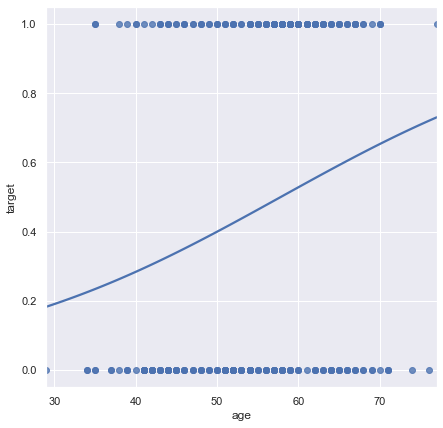

In [52]:
sns.set(rc={'figure.figsize':(7,7)})
sns.regplot(x=hdf['age'],y=hdf['target'],data=hdf, logistic=True,ci=None)

In [296]:
## Splitting of dataset as training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exange,olpeak,slope,ca,tha
262,60,0,1,150,240,0,0,171,0,0.9,1,0,3
17,54,1,4,140,239,0,0,160,0,1.2,1,0,3
89,51,0,3,130,256,0,2,149,0,0.5,1,0,3
138,35,1,4,120,198,0,0,130,1,1.6,2,0,7
47,50,1,4,150,243,0,2,128,0,2.6,2,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,45,1,2,128,308,0,2,170,0,0.0,1,0,3
14,52,1,3,172,199,1,0,162,0,0.5,1,0,7
175,57,1,4,152,274,0,0,88,1,1.2,2,1,7
26,58,0,3,120,340,0,0,172,0,0.0,1,0,3


In [297]:
# Feature Scaling using StandarScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(x_train)
X_test=scaler.transform(x_test)
X_test

array([[ 0.57926614, -1.39686059, -2.53815006,  1.08279931, -0.13152459,
        -0.41119597, -0.97557603,  0.95922586, -0.70929937, -0.12611524,
        -1.00262278, -0.76104094, -0.87612572],
       [-0.07123226,  0.71589105,  0.87425169,  0.50689286, -0.15025852,
        -0.41119597, -0.97557603,  0.48469339, -0.70929937,  0.13698724,
        -1.00262278, -0.76104094, -0.87612572],
       [-0.39648146, -1.39686059, -0.26321556, -0.06901358,  0.16821832,
        -0.41119597,  1.04228208,  0.01016091, -0.70929937, -0.47691854,
        -1.00262278, -0.76104094, -0.87612572],
       [-2.13114386,  0.71589105,  0.87425169, -0.64492003, -0.91834971,
        -0.41119597, -0.97557603, -0.80948609,  1.40984195,  0.48779054,
         0.62579811, -0.76104094,  1.2025255 ],
       [-0.50489786,  0.71589105,  0.87425169,  1.08279931, -0.07532279,
        -0.41119597,  1.04228208, -0.89576472, -0.70929937,  1.3647988 ,
         0.62579811, -0.76104094,  1.2025255 ],
       [ 0.25401694,  0.715891

In [298]:
## Logistic Model using sklearn on training dataset
from sklearn.linear_model import LogisticRegression
LRModel=LogisticRegression()

LRModel.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [299]:
pred=LRModel.predict(x_test)
pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [300]:
train=pd.concat([x_train,y_train],axis=1,join='inner')
train.to_csv(r'C:\Users\Asus\OneDrive\Desktop\MSc_Statistics\ST-406 Project\Hearttrain.csv',index=False)

In [301]:
log_rego=smf.logit("target~age+sex+cp+trestbps+chol+fbs+restecg+thalach+exange+olpeak+slope+ca+tha",data=train).fit()

Optimization terminated successfully.
         Current function value: 0.338995
         Iterations 7


In [302]:
log_rego.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.510     
Dependent Variable: target           AIC:              192.0738  
Date:               2022-05-19 16:18 BIC:              240.9189  
No. Observations:   242              Log-Likelihood:   -82.037   
Df Model:           13               LL-Null:          -167.34   
Df Residuals:       228              LLR p-value:      1.3946e-29
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|    [0.025    0.975]
------------------------------------------------------------------
Intercept    -7.0266    3.2786  -2.1432  0.0321  -13.4525  -0.6008
age          -0.0151    0.0271  -0.5567  0.5778   -0.0682   0.0380
sex           1.3188    0.5415   2.4354  0.0149    0.2574   2.3802
cp            0.5737    0.2403   2.3872  0.0170    0.1027   1.0446
trestbps      0.0299    0.0125   2.3834  0.0172    0.0053   0.0545
chol          0.0037    0.0041   0.8989  0.3687   -0.0043   0.0116
fbs          -0.6695    0.6021  -1.1120  0.2661   -1.8497   0.5106
restecg       0.3622    0.2095   1.7283  0.0839   -0.0485   0.7728
thalach      -0.0241    0.0113  -2.1327  0.0329   -0.0462  -0.0020
exange        1.1265    0.4587   2.4557  0.0141    0.2274   2.0256
olpeak        0.5165    0.2365   2.1838  0.0290    0.0529   0.9801
slope         0.2996    0.4041   0.7414  0.4585   -0.4924   1.0916
ca            0.9892    0.2723   3.6324  0.0003    0.4555   1.5230
tha           0.3244    0.1134   2.8617  0.0042    0.1022   0.5466
=================================================================

"""

In [303]:
log_reg=smf.logit("target~age+pd.Categorical(sex)+pd.Categorical(cp)+trestbps+chol+pd.Categorical(fbs)+pd.Categorical(restecg)+thalach+pd.Categorical(exange)+olpeak+pd.Categorical(slope)+pd.Categorical(ca)+pd.Categorical(tha)",data=train).fit()

Optimization terminated successfully.
         Current function value: 0.314349
         Iterations 8


### Summary of Logistics Regression Model on Original data

In [304]:
log_reg.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
============================================================================
Model:                   Logit               Pseudo R-squared:    0.545     
Dependent Variable:      target              AIC:                 194.1451  
Date:                    2022-05-19 16:18    BIC:                 267.4128  
No. Observations:        242                 Log-Likelihood:      -76.073   
Df Model:                20                  LL-Null:             -167.34   
Df Residuals:            221                 LLR p-value:         3.1050e-28
Converged:               1.0000              Scale:               1.0000    
No. Iterations:          8.0000                                             
----------------------------------------------------------------------------
                              Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
Intercept                    -4.7186   3.2676 -1.4441 0.1487 -11.1230 1.6858
pd.Categorical(sex)[T.1]      1.4412   0.5885  2.4489 0.0143   0.2878 2.5947
pd.Categorical(cp)[T.2]       0.2389   0.9830  0.2430 0.8080  -1.6878 2.1656
pd.Categorical(cp)[T.3]      -0.2306   0.8774 -0.2628 0.7927  -1.9504 1.4891
pd.Categorical(cp)[T.4]       1.5804   0.8729  1.8106 0.0702  -0.1304 3.2912
pd.Categorical(fbs)[T.1]     -0.4111   0.6480 -0.6343 0.5259  -1.6812 0.8591
pd.Categorical(restecg)[T.1]  0.6783   2.8032  0.2420 0.8088  -4.8159 6.1726
pd.Categorical(restecg)[T.2]  0.8210   0.4509  1.8209 0.0686  -0.0627 1.7047
pd.Categorical(exange)[T.1]   0.8805   0.4948  1.7795 0.0752  -0.0893 1.8504
pd.Categorical(slope)[T.2]    0.5673   0.5427  1.0454 0.2959  -0.4963 1.6309
pd.Categorical(slope)[T.3]    0.4511   1.0239  0.4405 0.6596  -1.5558 2.4580
pd.Categorical(ca)[T.1]       1.5907   0.5609  2.8358 0.0046   0.4913 2.6902
pd.Categorical(ca)[T.2]       2.5972   0.8256  3.1459 0.0017   0.9791 4.2153
pd.Categorical(ca)[T.3]       1.8599   0.9072  2.0503 0.0403   0.0820 3.6379
pd.Categorical(tha)[T.6]      0.4492   0.9580  0.4689 0.6392  -1.4284 2.3267
pd.Categorical(tha)[T.7]      1.2622   0.4898  2.5768 0.0100   0.3022 2.2223
age                          -0.0251   0.0284 -0.8827 0.3774  -0.0808 0.0306
trestbps                      0.0313   0.0132  2.3697 0.0178   0.0054 0.0572
chol                          0.0034   0.0044  0.7785 0.4363  -0.0052 0.0121
thalach                      -0.0233   0.0128 -1.8187 0.0690  -0.0484 0.0018
olpeak                        0.6083   0.2702  2.2511 0.0244   0.0787 1.1380
============================================================================

"""

In [305]:
log_rego.params

Intercept   -7.026604
age         -0.015079
sex          1.318813
cp           0.573659
trestbps     0.029900
chol         0.003657
fbs         -0.669543
restecg      0.362150
thalach     -0.024078
exange       1.126488
olpeak       0.516505
slope        0.299590
ca           0.989203
tha          0.324437
dtype: float64

In [308]:
## Vector of estimated parameters
beta=np.array([-7.026604,-0.015079,1.318813,0.57365,0.029900,0.003657,-0.669543,0.362150,-0.024078,1.126488,0.516505,0.299590,0.989203,0.324437])

In [309]:
from statsmodels.stats.anova import anova_lm

### Table for Odds ratio and corresponding 95% Confidence interval

In [310]:
model_odds=pd.DataFrame(np.exp(log_rego.params),columns=['OR'])
model_odds['Z_value']=log_rego.pvalues
model_odds[['2.5%', '97.5%']]=np.exp(log_rego.conf_int())
model_odds

,OR,Z_value,2.5%,97.5%
Intercept,0.000888,0.032097,0.000001,0.548399
age,0.985034,0.577756,0.934099,1.038746
sex,3.738982,0.014877,1.293614,10.806926
cp,1.774748,0.016976,1.108129,2.842387
trestbps,1.030352,0.017156,1.005326,1.056001
chol,1.003663,0.368724,0.995692,1.011698
fbs,0.511943,0.266144,0.157290,1.666258
restecg,1.436415,0.083934,0.952617,2.165915
thalach,0.976209,0.032947,0.954845,0.998051
exange,3.084805,0.014060,1.255349,7.580377


### Predicted Probabilities

In [311]:
y_pred=log_rego.predict(x_test)
y_pred   

262    0.012436
17     0.244673
89     0.070195
138    0.887367
47     0.955297
         ...   
148    0.084586
14     0.344864
175    0.991515
26     0.014522
39     0.429038
Length: 61, dtype: float64

### Comparision of Observed and Predicted Response

In [312]:
print("Actual Values:",list(y_test.values))
print("Prediction:",list(map(round,y_pred)))

Actual Values: [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0]
Prediction: [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0]


### Confusion Matrix

In [313]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test,round(y_pred))

array([[33,  3],
       [ 6, 19]], dtype=int64)

### Accuracy Score

In [314]:
accuracy_score(y_test,round(y_pred))

0.8524590163934426

### VIF

In [315]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [316]:
X1=hdf1.iloc[:,:]
X1

,age,trestbps,chol,thalach,olpeak
0,63,145,233,150,2.3
1,67,160,286,108,1.5
2,67,120,229,129,2.6
3,37,130,250,187,3.5
4,41,130,204,172,1.4
...,...,...,...,...,...
298,45,110,264,132,1.2
299,68,144,193,141,3.4
300,57,130,131,115,1.2
301,57,130,236,174,0.0


In [317]:
### Calculation of VIF only for numerical Variables
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(X1.values,i)for i in range(len(X1.columns))]
print(vif)

         VIF
0  36.685632
1  55.971579
2  24.354973
3  29.326738
4   2.084119


### Principal Component Analysis

In [318]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_stan=scaler.fit_transform(x)
x_stan

array([[ 0.94872647,  0.68620244, -2.25177456, ...,  2.27457861,
        -0.72842926,  0.65528247],
       [ 1.39200191,  0.68620244,  0.87798549, ...,  0.64911323,
         2.48585324, -0.895894  ],
       [ 1.39200191,  0.68620244,  0.87798549, ...,  0.64911323,
         1.41442574,  1.17234129],
       ...,
       [ 0.28381332,  0.68620244,  0.87798549, ...,  0.64911323,
         0.34299824,  1.17234129],
       [ 0.28381332, -1.4572959 , -1.20852121, ...,  0.64911323,
         0.34299824, -0.895894  ],
       [-1.82174501,  0.68620244, -0.16526786, ..., -0.97635214,
         0.34299824, -0.895894  ]])

In [319]:
from sklearn.decomposition import PCA
pca=PCA(n_components=13)
X_pca=pca.fit_transform(x_stan)
explained_variance=pca.explained_variance_ratio_
print(explained_variance)

[0.23649191 0.12299629 0.09571867 0.08459665 0.07601373 0.06785314
 0.06625773 0.05977921 0.05280761 0.04315682 0.03499762 0.03177738
 0.02755325]


### Scree Plot 

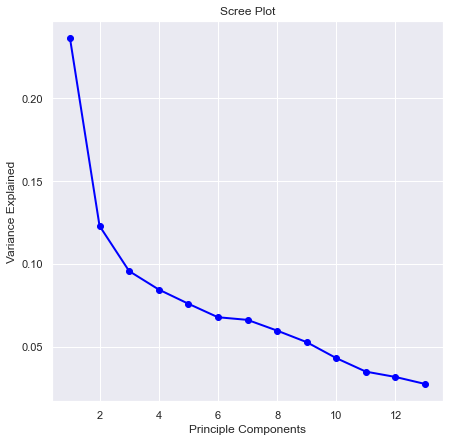

In [320]:
PCA=[1,2,3,4,5,6,7,8,9,10,11,12,13]
plt.plot(PCA,explained_variance,'o-',linewidth=2,color='blue')
plt.title('Scree Plot')
plt.xlabel('Principle Components')
plt.ylabel('Variance Explained')
plt.show()

In [321]:
## Principal Components
Xpca=pd.DataFrame(X_pca)
Xpca

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.166745,0.952144,3.087229,2.403715,-0.121293,0.031344,0.979387,0.622356,-1.488823,-0.459357,-0.221343,-0.471248,0.128278
1,3.190782,1.460879,-0.436539,-0.891345,0.142445,-0.770547,0.281224,-1.054736,0.422592,1.472191,1.033516,0.960517,1.029697
2,3.133634,-0.627956,-0.347446,-0.600455,-0.042932,-1.115737,0.495478,-0.170099,0.047138,0.453506,-0.342794,-0.920889,-0.201756
3,-0.463230,-1.388901,0.257402,2.857784,-0.780945,-0.041468,-0.760007,2.113241,0.895477,0.216910,1.536679,-0.169559,0.567354
4,-2.282119,0.383244,-0.122726,1.202794,-0.800699,-0.258334,0.673586,-0.031292,1.056596,0.576542,-0.853539,0.203072,-1.154884
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-0.676201,-1.465368,0.578418,1.172215,0.243073,-0.844850,-0.840767,0.928594,-2.048618,-0.127868,-0.923385,1.012585,-0.343748
299,2.621644,0.040244,2.182901,-0.059692,2.141270,0.382190,0.155629,1.003242,0.880612,-0.792094,0.723790,-0.705497,-0.733137
300,1.885179,-2.371744,-0.171360,-0.017140,1.476962,0.420695,0.265698,-1.315964,0.239335,0.151753,-0.514436,-0.038227,0.287062
301,-1.334783,1.506632,-0.156484,0.875433,-0.142806,-0.832332,0.716529,0.116531,0.355273,0.277818,-1.100542,-0.409413,1.015974


In [322]:
from sklearn.model_selection import train_test_split
x_trainp,x_testp,y_trainp,y_testp=train_test_split(Xpca,y,test_size=0.20)
x_trainp

,0,1,2,3,4,5,6,7,8,9,10,11,12
232,-0.142139,-0.683505,0.344769,-1.109038,0.990618,-2.211297,1.833339,-0.420563,1.364501,0.992861,-0.122115,1.281228,-0.175759
67,-0.181510,-0.049965,1.178355,0.049584,-1.186690,-0.523070,-0.768899,-1.011376,0.574476,-0.818088,-0.180236,-0.267514,-1.039837
96,1.780778,-1.199494,-0.606197,-0.734124,-0.830026,-0.499250,0.661200,-0.084176,-0.450201,-0.019357,-0.615903,-0.884392,0.303260
295,-3.155270,-1.670950,0.820678,0.305801,0.399678,-0.221743,0.064016,-0.249063,0.423724,0.605110,0.076202,-0.093254,0.093339
57,-1.199737,-2.122580,0.123280,-0.902824,-1.026750,-0.468832,0.933970,-0.481486,0.710839,-1.402786,-0.795973,0.108091,-0.539467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,0.114572,-0.652844,0.348829,2.164176,0.197924,0.002280,-0.891399,0.278900,0.710544,0.273084,1.787243,0.580118,-0.764375
252,2.140458,-0.935983,-0.891771,-1.018444,0.922394,0.416387,-0.529315,-0.810028,-1.374038,-0.199315,-0.211542,0.329206,0.811391
225,-3.483189,-0.633043,-0.327171,0.882851,-0.017007,0.462782,-0.285570,1.033029,0.992587,0.750235,-0.833999,0.092060,-0.511662
220,-1.808736,0.011817,-1.599879,-0.407274,-1.716677,0.828052,0.871279,0.208717,0.098197,1.227961,-1.028379,-0.235759,-0.229092


In [323]:
trainp=pd.concat([x_trainp,y_trainp],axis=1,join='inner')

In [324]:
# Model on training dataset
from sklearn.linear_model import LogisticRegression
LRModelp=LogisticRegression()

LRModelp.fit(x_trainp,y_trainp)

LogisticRegression()

In [325]:
LRModelp.intercept_

array([-0.20994738])

In [326]:
LRModel.coef_

array([[-0.04454007,  0.53793404,  0.4405445 ,  0.02192871,  0.00169106,
        -0.14553813,  0.38690299, -0.04008362,  0.64712699,  0.56722765,
         0.01279432,  0.95281966,  0.35755973]])

In [327]:
y_predp=LRModelp.predict(x_testp)
y_predp

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [328]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_testp,y_predp)

array([[30,  3],
       [ 7, 21]], dtype=int64)

In [329]:
accuracy_score(y_testp,y_predp)

0.8360655737704918

## Ridge Regression

### Estimate of sigma^2 i.e. MSE

In [330]:
residual=y_test-y_pred
res_sum_squares=residual.T@residual
mse=res_sum_squares/(303-14)
mse

0.027163359984002895

### Biasing parameter 'c' for parameter estimation under Ridge regression

In [331]:
c=mse*13/(beta.T@beta)
c

0.0064518746884831115

In [333]:
from sklearn.linear_model import LogisticRegression
LRModelR=LogisticRegression(C=0.0065,penalty='l2')

LRModelR.fit(x_train,y_train)

LogisticRegression(C=0.0065)

In [334]:
LRModelR.intercept_

array([0.00177365])

In [335]:
LRModelR.coef_

array([[-2.37045614e-05,  6.98341924e-02,  1.15927484e-01,
         1.70775569e-02,  2.08540978e-03, -1.43728709e-03,
         7.30750535e-02, -3.30512516e-02,  6.81086941e-02,
         1.41268068e-01,  4.34295937e-02,  1.49421398e-01,
         2.55992733e-01]])

In [336]:
y_predR=LRModelR.predict(x_test)
y_predR

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [337]:
accuracy_score(y_test,y_predR)

0.7704918032786885

Text(0.5, 1.0, 'Accuracy Score using different techniques')

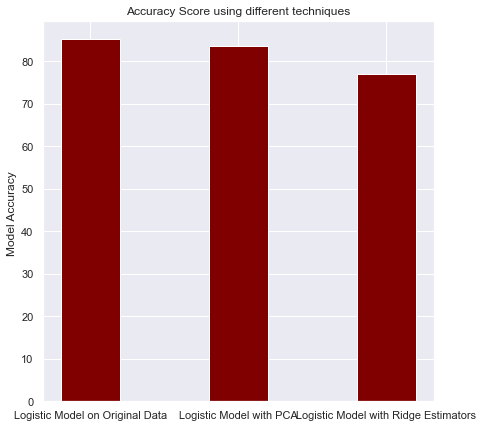

In [339]:
# Accuracy Plot
Acc_Score=[accuracy_score(y_test,round(y_pred))*100,accuracy_score(y_testp,y_predp)*100,accuracy_score(y_test,y_predR)*100]
Models=['Logistic Model on Original Data','Logistic Model with PCA','Logistic Model with Ridge Estimators']
plt.bar(Models,Acc_Score,color='maroon',width=0.4)
plt.ylabel("Model Accuracy ")
plt.title("Accuracy Score using different techniques")